<a href="https://colab.research.google.com/github/danielacarv/PLN/blob/main/PLN_Tarea2_ColohuaCarvajalDaniela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ****Tarea 2****

#Alumna: Colohua Carvajal Daniela

---

Procesamiento de Lenguaje Natural
Facultad de Ingeniería, UNAM

# Instrucciones

A partir del corpus seleccionado en la tarea anterior realizar un modelo del
lenguaje neuronal con base en la arquitectura propuesta por Bengio (2003). El
corpus ya debe estar preprocesado. S ́ıganse los siguientes pasos:



Comenzamos importando el archivo de la tarea anterior




In [ ]:
from pln_tarea1_colohuacarvajaldaniela import pers_final 


Paso 1: Palabras stemizadas

El corpus con el que se está trabajando es el de la tarea pasada, por lo que en esta ocasión no es necesario realizar la stemización porque esta ya se aplicó al corpus.

Se puede ver con la siguiente impresion del corpus

In [187]:
for i in range(10):
  print(pers_final[i])

print(len(pers_final))

persuas
jane
austen
1818
chapter
1
sire
walter
elliot
kellynch
38383


Antes de comenzar con los siguientes pasos, se realizaron oraciones para poder indexar y agregar los símbolos de inicio y fin de cadena, por esto, se creó la lista oraciones, en la que se agruparon los tokens en oraciones de 6 palabras cada una.

In [3]:
oraciones = [] #Para guardar todas las oraciones

tupla = []  # Para guardar una oracion
count = 0  #Contador para palabras en cada oracion
for i in range(len(pers_final)): #Recorre cada palabra del corpus 
  if (count < 5):  #Para condicionar el numero de palabras por oracion
    tupla.append(pers_final[i]) #Se agrega la palabra a la oracion
    count += 1   #Cuenta palabras
  else:
    tupla.append(pers_final[i])  #agrega ultima palabra a la oracion
    oraciones.append(tupla)   #Agrega la oracion creada
    tupla = []   #Limpia para guardar otra otra oracion
    count = 0     #Reinicia contador de palabras
  
print(oraciones)  #Muestra lista con oraciones


[['persuas', 'jane', 'austen', '1818', 'chapter', '1'], ['sire', 'walter', 'elliot', 'kellynch', 'hall', 'somersetshir'], ['mane', 'amus', 'never', 'took', 'book', 'baronetag'], ['found', 'occup', 'idl', 'hour', 'consol', 'distress'], ['one', 'faculti', 'rous', 'admir', 'respect', 'contempl'], ['limit', 'remnant', 'earliest', 'patent', 'unwelcom', 'sensat'], ['aris', 'domestic', 'affair', 'chang', 'natur', 'piti'], ['contempt', 'turn', 'almost', 'endless', 'creation', 'last'], ['centuri', 'everi', 'leaf', 'powerless', 'could', 'read'], ['histori', 'interest', 'never', 'fail', 'page', 'favourit'], ['volum', 'always', 'open', 'elliot', 'kellynch', 'hall'], ['walter', 'elliot', 'born', 'march', '1', '1760'], ['marri', 'juli', '15', '1784', 'elizabeth', 'daughter'], ['james', 'stevenson', 'esq', 'south', 'park', 'counti'], ['gloucester', 'ladi', 'die', '1800', 'issu', 'elizabeth'], ['born', 'june', '1', '1785', 'ann', 'born'], ['august', '9', '1787', 'still', 'born', 'sone'], ['november', 

2. Insertar símbolos de inicio y final de cadena

se inserta BOS para inicio de cadena y EOS para final de cadena

In [4]:
def inicio_fin(corpus):
  BOS = 'BOS'
  EOS = 'EOS'

  inserta_sim = []
  for cadena in corpus:
    inserta_sim.append([BOS] + cadena + [EOS])
  return inserta_sim

simbolos = inicio_fin(oraciones)
print(simbolos)

[['BOS', 'persuas', 'jane', 'austen', '1818', 'chapter', '1', 'EOS'], ['BOS', 'sire', 'walter', 'elliot', 'kellynch', 'hall', 'somersetshir', 'EOS'], ['BOS', 'mane', 'amus', 'never', 'took', 'book', 'baronetag', 'EOS'], ['BOS', 'found', 'occup', 'idl', 'hour', 'consol', 'distress', 'EOS'], ['BOS', 'one', 'faculti', 'rous', 'admir', 'respect', 'contempl', 'EOS'], ['BOS', 'limit', 'remnant', 'earliest', 'patent', 'unwelcom', 'sensat', 'EOS'], ['BOS', 'aris', 'domestic', 'affair', 'chang', 'natur', 'piti', 'EOS'], ['BOS', 'contempt', 'turn', 'almost', 'endless', 'creation', 'last', 'EOS'], ['BOS', 'centuri', 'everi', 'leaf', 'powerless', 'could', 'read', 'EOS'], ['BOS', 'histori', 'interest', 'never', 'fail', 'page', 'favourit', 'EOS'], ['BOS', 'volum', 'always', 'open', 'elliot', 'kellynch', 'hall', 'EOS'], ['BOS', 'walter', 'elliot', 'born', 'march', '1', '1760', 'EOS'], ['BOS', 'marri', 'juli', '15', '1784', 'elizabeth', 'daughter', 'EOS'], ['BOS', 'james', 'stevenson', 'esq', 'south',

3. Obtener los bigramas que aparecen en el texto (indexar numéricamente)

In [165]:
def indices(msg):
  dic = {}
  indice = 0
  aux_BE = []
  for palabra in msg:
    for elemento in palabra:
      if elemento not in dic and elemento != 'BOS' and elemento != 'EOS':
        dic[elemento] = indice
        indice += 1  
      elif(elemento == 'BOS' or elemento == 'EOS'):
        #print(elemento)
        if elemento not in aux_BE:
          aux_BE.append(elemento)
  print(aux_BE)
  for be in aux_BE:
      #print(max(dic.values()))
      if be == 'EOS':
        dic[be] = max(dic.values()) + 1
      else:
        dic[be] = max(dic.values()) + 2
  return dic

dic_indices = indices(simbolos)
print(dic_indices)
#print(max(dic_indices.values()))
#a = dic_indices['BOS']
#b = dic_indices['EOS']
#print(a)
#print(b)



['BOS', 'EOS']
{'persuas': 0, 'jane': 1, 'austen': 2, '1818': 3, 'chapter': 4, '1': 5, 'sire': 6, 'walter': 7, 'elliot': 8, 'kellynch': 9, 'hall': 10, 'somersetshir': 11, 'mane': 12, 'amus': 13, 'never': 14, 'took': 15, 'book': 16, 'baronetag': 17, 'found': 18, 'occup': 19, 'idl': 20, 'hour': 21, 'consol': 22, 'distress': 23, 'one': 24, 'faculti': 25, 'rous': 26, 'admir': 27, 'respect': 28, 'contempl': 29, 'limit': 30, 'remnant': 31, 'earliest': 32, 'patent': 33, 'unwelcom': 34, 'sensat': 35, 'aris': 36, 'domestic': 37, 'affair': 38, 'chang': 39, 'natur': 40, 'piti': 41, 'contempt': 42, 'turn': 43, 'almost': 44, 'endless': 45, 'creation': 46, 'last': 47, 'centuri': 48, 'everi': 49, 'leaf': 50, 'powerless': 51, 'could': 52, 'read': 53, 'histori': 54, 'interest': 55, 'fail': 56, 'page': 57, 'favourit': 58, 'volum': 59, 'always': 60, 'open': 61, 'born': 62, 'march': 63, '1760': 64, 'marri': 65, 'juli': 66, '15': 67, '1784': 68, 'elizabeth': 69, 'daughter': 70, 'james': 71, 'stevenson': 72

In [6]:
def indices_lista (diccionario, corpus):
  idx = []
  for elemento in corpus:
    for palabra in elemento:
      for key in diccionario:
        if (palabra == key):
          idx.append(diccionario[palabra])
  return idx

indices = indices_lista(dic_indices,simbolos)
print (indices)

[3890, 0, 1, 2, 3, 4, 5, 3891, 3890, 6, 7, 8, 9, 10, 11, 3891, 3890, 12, 13, 14, 15, 16, 17, 3891, 3890, 18, 19, 20, 21, 22, 23, 3891, 3890, 24, 25, 26, 27, 28, 29, 3891, 3890, 30, 31, 32, 33, 34, 35, 3891, 3890, 36, 37, 38, 39, 40, 41, 3891, 3890, 42, 43, 44, 45, 46, 47, 3891, 3890, 48, 49, 50, 51, 52, 53, 3891, 3890, 54, 55, 14, 56, 57, 58, 3891, 3890, 59, 60, 61, 8, 9, 10, 3891, 3890, 7, 8, 62, 63, 5, 64, 3891, 3890, 65, 66, 67, 68, 69, 70, 3891, 3890, 71, 72, 73, 74, 75, 76, 3891, 3890, 77, 78, 79, 80, 81, 69, 3891, 3890, 62, 82, 5, 83, 84, 62, 3891, 3890, 85, 86, 87, 88, 62, 89, 3891, 3890, 90, 91, 92, 93, 62, 90, 3891, 3890, 94, 95, 96, 97, 98, 99, 3891, 3890, 100, 101, 6, 7, 102, 103, 3891, 3890, 104, 105, 106, 107, 93, 108, 3891, 3890, 65, 109, 110, 111, 112, 89, 3891, 3890, 113, 112, 114, 73, 115, 76, 3891, 3890, 116, 117, 118, 119, 120, 121, 3891, 3890, 122, 123, 54, 124, 125, 28, 3891, 3890, 105, 126, 127, 128, 129, 130, 3891, 3890, 131, 132, 133, 134, 135, 136, 3891, 3890, 

Obteniendo bigramas


In [7]:
def bigramas (index):
  info=[]
  #lista=[9,3,2,9,9,1,8]
  j = 1
  for i in index:
    if i == 3891:
      exit
    
    else:
      if j < len(index):
      #print (lista[j])
        info.append((i,index[j]))
    j +=1
  
  return info

a = bigramas(indices)
print (a)

[(3890, 0), (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 3891), (3890, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 3891), (3890, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 3891), (3890, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23), (23, 3891), (3890, 24), (24, 25), (25, 26), (26, 27), (27, 28), (28, 29), (29, 3891), (3890, 30), (30, 31), (31, 32), (32, 33), (33, 34), (34, 35), (35, 3891), (3890, 36), (36, 37), (37, 38), (38, 39), (39, 40), (40, 41), (41, 3891), (3890, 42), (42, 43), (43, 44), (44, 45), (45, 46), (46, 47), (47, 3891), (3890, 48), (48, 49), (49, 50), (50, 51), (51, 52), (52, 53), (53, 3891), (3890, 54), (54, 55), (55, 14), (14, 56), (56, 57), (57, 58), (58, 3891), (3890, 59), (59, 60), (60, 61), (61, 8), (8, 9), (9, 10), (10, 3891), (3890, 7), (7, 8), (8, 62), (62, 63), (63, 5), (5, 64), (64, 3891), (3890, 65), (65, 66), (66, 67), (67, 68), (68, 69), (69, 70), (70, 3891), (3890, 71), (71, 72), (72, 73), (73, 74), (74, 75), (75, 76), (76, 

4. Entrenar con los bigramas la red neuronal y obtener los valores para los hi-
perpar ́ametros. Tomar de 100 unidades para la primera capa oculta (capa lineal) y 300 para la segunda capa oculta (capa con tanh).

Para realizar este punto, se crea una clase llamada entrenamiento, que incluye el modelo de Bengio con el vector one_hot, primera y segunda capa oculta.

Además, condiene las funciones para realizar el entrenamiento, estas son llamadas **forward** y **backprop**

In [98]:
#from tqdm.notebook import nbtqdm
import math
N = max(dic_indices.values())
class entrenamiento:
  def __init__(self, bigramas, d, m, N):
        self.d = d
        self.m = m
        self.N = N
        self.bigramas = bigramas

  def inicializar_pesos(self, device):
        self.C = np.random.randn(d,N)
        self.W = np.random.rand(m,d)/np.sqrt(d)
        self.b = np.ones(m)
        self.U = np.random.rand(N,m)
        self.c = np.ones(N)

  def one_hot(indice_palabra):
    tam = max(indices) +1
    matriz = np.identity(tam,int)
    return matriz[:,indice_palabra] 

  def embeding(d,vec_palabra):
    Cx=[]
    for i in range(self.C.shape[0]):
      elemento = 0    
      for j in range(self.C.shape[1]):
          temp = self.C[i][j] * vec_palabra[j]
          elemento = (elemento + temp)
          
      Cx.append(elemento/N-1)
      
    return Cx
  
  def capa_tanh(d, m, ci):
    SC = np.tanh(np.dot(self.W,ci) + b1)
    return SC
  
  def capa_salida(vec_capah,m):
    ai = np.dot(self.U,hi) + self.c
    
    eai = np.exp(ai)
    out = eai/eai.sum()
    keys = dic_indices.keys()
    p= dict(zip(keys,out))
    return p

  def forward(self, i_x):
        # La capa embedding se reduce a C_1[:, i_x]
        h_i = np.tanh(np.dot(self.W, self.C[:, i_x]) + self.b) # Segunda capa oculta
        a = self.U.dot(h_i) + self.c # Preactivación
        exp_a = np.exp(a - a.max()) # Exponencial de la preactivación
        prob_salida = exp_a/exp_a.sum() # Capa de salida softmax
        return prob_salida, h_i

  def backprop(self, i_x, i_y, prob_salida, h_i, lr=0.1):
        y_pred = np.argmax(prob_salida) # El índice de la palabra que predijo
        
        # Backprop
        # Copio el arreglo para no modificar pesos de la salida original
        d_out = np.array(prob_salida, copy=True) 
        
        #d_out[i_y] -= 1  # p(w_k | w_i) - y_k
        d_h = (1-h_i**2)*np.dot(d_out.T, self.U)
        d_c = np.dot(d_h.T, self.W)

        # Actualizamos los pesos
        self.U -= lr*np.outer(d_out, h_i) 
        self.c -= lr*d_out
        self.W -= lr*np.outer(d_h, self.C[:,i_x]) 
        self.b -= lr*d_h
        self.C[:, i_x] -= lr*d_c # Las demás filas no nos interesan, porque son 00

  def predecir(self, i_x):
        return np.argmax(self.forward(i_x)[0])
    
  def entrenar(self, epochs=50, lr=[]):
        entr_timeline = [] # Entropía a través de las épocas
        min_entr = np.inf
        for epoch in range(epochs):
            #np.random.shuffle(bigramas)
            cross_entropy = 0
            for bigrama in self.bigramas:
                i_x = bigrama[0] # El índice de la primer palabra del bigrama
                i_y = bigrama[1] # El índice de la segunda palabra del bigrama
                # print(f'  Bigrama: {inv_vocab[i_x]} {inv_vocab[i_y]}')
                prob_salida, h_i = self.forward(i_x)
                # print(f'  Predicción: {inv_vocab[i_x]} {inv_vocab[np.argmax(prob_salida)]}')
                self.backprop(i_x, i_y, prob_salida, h_i, lr)
                cross_entropy -= np.log(prob_salida[i_y-1])
                        
            # Si la entropua actual es mejor que la menor...
            if cross_entropy < min_entr:
                min_entr = cross_entropy  # ponemos la actual
                # y movemos los mejores pesos
                self.best_C = self.C
                self.best_W = self.W
                self.best_b = self.b
                self.best_U = self.U
                self.best_c = self.c
                
            entr_timeline.append(cross_entropy)    
            print("Epoch: ",(epoch+1), "\tEntropía cruzada: ",cross_entropy)
        return entr_timeline

  def guardar_pesos(self, archivo):
    C = self.C, 
    W = self.W, 
    b = self.b, 
    U = self.U, 
    c = self.c
      

Con lo anterior, se puede realizar el entrenamiento con los valores de d y m solicitados.

In [99]:
import torch
epochs = 30
lr = 0.01
modelo = entrenamiento(a,100,300,N)
modelo.inicializar_pesos(1)
hist_entropia = modelo.entrenar(epochs, lr=lr)

Epoch:  1 	Entropía cruzada:  377407.0547353306
Epoch:  2 	Entropía cruzada:  372738.8807711593
Epoch:  3 	Entropía cruzada:  371143.046877859
Epoch:  4 	Entropía cruzada:  370558.4400412365
Epoch:  5 	Entropía cruzada:  370332.354743844
Epoch:  6 	Entropía cruzada:  370239.4404501683
Epoch:  7 	Entropía cruzada:  370198.7189181336
Epoch:  8 	Entropía cruzada:  370179.89587399847
Epoch:  9 	Entropía cruzada:  370170.8759708551
Epoch:  10 	Entropía cruzada:  370166.46032997826
Epoch:  11 	Entropía cruzada:  370164.27309614595
Epoch:  12 	Entropía cruzada:  370163.1828544951
Epoch:  13 	Entropía cruzada:  370162.6375729954
Epoch:  14 	Entropía cruzada:  370162.3643112309
Epoch:  15 	Entropía cruzada:  370162.2271746423
Epoch:  16 	Entropía cruzada:  370162.1582569146
Epoch:  17 	Entropía cruzada:  370162.1235604943
Epoch:  18 	Entropía cruzada:  370162.10604612884
Epoch:  19 	Entropía cruzada:  370162.0971678807
Epoch:  20 	Entropía cruzada:  370162.092636964
Epoch:  21 	Entropía cruzada

5. Evaluar el modelo (con Entrop ́ıa y/o Perplejidad).

Se pueden observar algunas predicciones de bigramas con una lista de palabras y el índice de alguna otra.

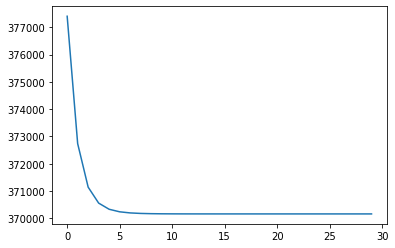

In [102]:
plt.plot(hist_entropia)
plt.show()

In [140]:
test_w = ['the', 'when', 'by', 'in', 'walter', 'out']
inv_vocab = { item : key for key, item in dic_indices.items()}
print('Predicción de bigramas:')
for w in test_w:
    print(f'  {w} {inv_vocab[modelo.predecir(3800)]}')

Predicción de bigramas:
  the scheherazad
  when scheherazad
  by scheherazad
  in scheherazad
  walter scheherazad
  out scheherazad


6. Calcular la proabilidad de 5 oraciones no vistas en el entrenamiento.

Para este paso, se creo una lista con 5 oraciones. A esta lista se le realizaron los pasos que se aplicaron al corpus en un inicio, estos son:



1.   Agregar símbolos de inicio y fin
2.   Indexar
3.   Obtener bigramas

Todo esto se hizo con las funciones realizadas anteriormente



In [169]:
lista_oraciones = ["the crown is in the city", "out of the city is fine", "the clock is in the first minute"
                    "whe you learn all are good","the best of you is smile"]

palabras = []
oraciones = []
for oracion in lista_oraciones:
  sep = oracion.split(' ')
  oraciones.append(sep)

print(oraciones)

#Se agregan los simbolos de inicio y fin
infi = inicio_fin(oraciones)
print(infi)
#Se indexa
index = indices(inicio_fin(oraciones))
print(index)
#Bigramas
il = indices_lista(index,infi)
b = bigramas(il)
print(b)

[['the', 'crown', 'is', 'in', 'the', 'city'], ['out', 'of', 'the', 'city', 'is', 'fine'], ['the', 'clock', 'is', 'in', 'the', 'first', 'minutewhe', 'you', 'learn', 'all', 'are', 'good'], ['the', 'best', 'of', 'you', 'is', 'smile']]
[['BOS', 'the', 'crown', 'is', 'in', 'the', 'city', 'EOS'], ['BOS', 'out', 'of', 'the', 'city', 'is', 'fine', 'EOS'], ['BOS', 'the', 'clock', 'is', 'in', 'the', 'first', 'minutewhe', 'you', 'learn', 'all', 'are', 'good', 'EOS'], ['BOS', 'the', 'best', 'of', 'you', 'is', 'smile', 'EOS']]
['BOS', 'EOS']
{'the': 0, 'crown': 1, 'is': 2, 'in': 3, 'city': 4, 'out': 5, 'of': 6, 'fine': 7, 'clock': 8, 'first': 9, 'minutewhe': 10, 'you': 11, 'learn': 12, 'all': 13, 'are': 14, 'good': 15, 'best': 16, 'smile': 17, 'BOS': 19, 'EOS': 20}
[(19, 0), (0, 1), (1, 2), (2, 3), (3, 0), (0, 4), (4, 20), (20, 19), (19, 5), (5, 6), (6, 0), (0, 4), (4, 2), (2, 7), (7, 20), (20, 19), (19, 0), (0, 8), (8, 2), (2, 3), (3, 0), (0, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (1

Finalmente, se calculó la probabilidad de cada oración obteniendo las matrices A y Pi.

Se creó la función prob_lista_bigramas, que calcula la probabilidad.

In [179]:
matA = np.array([
    modelo.forward(i_x)[0] # Sólo nos interesa el vector de probabilidades
    for i_x in range(N)  # Iterar sobre todas las palabras del vocabulario
])
matPi = modelo.forward(20)[0]

def prob_lista_bigramas(lista_bi, A, Pi):
    prob = 1.0
    for w_i, w_j in lista_bi:
        prob *= modelo.forward(w_i)[0][w_j]
    return prob

for lista_bi, oracion in zip(b, lista_oraciones):
    print(f'Probabilidad de \"{oracion}\" = {prob_lista_bigramas(b, matA, matPi)}')

Probabilidad de "the crown is in the city" = 1.4714105090940954e-133
Probabilidad de "out of the city is fine" = 1.4714105090940954e-133
Probabilidad de "the clock is in the first minutewhe you learn all are good" = 1.4714105090940954e-133
Probabilidad de "the best of you is smile" = 1.4714105090940954e-133


#**Conclusiones**

Al término de esta tarea, puedo decir que se logró aplicar los conocimientos adquiridos en el semestre sobre el entrenamiento de una red neuronal. Se puede tener grandes aplicaciones para esto. Creo que este es un tema que se puede estudiar más a fondo para tener un mejor conocimiento de sus aplicaciones.